# Programming for Data Analysis 
## Student Name: Sam Tracey
## Student ID: G00398245
## November 2021

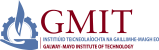
***

# The NumPy Random Package.

[Official Numpy Documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

<br>

## What is NumPy?

***

NumPy, which stands for Numerical Python, is an open sourced Python library. Created in 2005 by Travis E. Oliphant NumPy combined the features of two older Python packages:<br>
Numeric and Numarray ([1](https://www.nature.com/articles/s41586-020-2649-2)). Today NumPy is considered the universal standard for working with numerial data in Python and is
extensively used in engineering and science ([2](https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54))<br>
<br>
A key feature of NumPy is its N-Dimensional Array (ndarray) object. ([3](https://numpy.org/doc/stable/user/whatisnumpy.html)) Inherently, Python has lists which serve the purpose of an array however, these are slow to process due to the fact that a Python list is actually made up of pointers referencing an object in memory. ([4](https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65)) A NumPy array on the other hand is a collection of similar data-types stored in one continuous place in memory. To see how much faster a NumPy array is when compared to a Python list we can run the code below in which we create a list of one million elements and a NumPy array of one million elements.<br> We then calculate how long it takes to perform a simple mathematical operation on each element. In this example, NumPy performs the
operation several orders of magnitude faster (milliseconds versus seconds).


In [1]:
# Import NumPy package
import numpy as np

# create a Numpy array.
numpy_arr = np.arange(1000000)

# create a python list.
python_list = list(range(1000000))

# print out execution time for raising each element in the array to the power of 2.
print("NumPy Processing Time")
%time for i in range(10): numpy_arr = numpy_arr ** 2
 
# print out execution time for raising each element in the array to the power of 2.
print("List Processing Time")
%time for i in range(10): python_list2 = [x ** 2 for x in python_list]

NumPy Processing Time
Wall time: 39.1 ms
List Processing Time
Wall time: 3.76 s


<br>

Some key aspects of the ndarray are:
- They are homogenous. All items in an ndarray must be of the same type.
- The number of dimensions of an ndarray is defined by the ndarray shape.
- A separate data-type object (dtype) specifies the type of items in the ndarray.
- The size attribute indicates the total number of elements in the ndarray.


<br>

## The numpy.random package.

***

The <code>numpy.random</code> module provides the user with the ability to generate full arrays of pseudo-random numbers of specified shapes. It is considered supplemental to Python's built-in *random* module which only samples one value at a time.[5]<br>

A pseudo-random number is a mathematically generated sequence of nearly random numbers. All software pseudo-random generators (including numpy.random) work in fundamentally the<br> same way:  
> They start with a random number, known as the seed, and then use an algorithm to generate a pseudo-random sequence of bits based on it. ([6](https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom?redirectedfrom=MSDN))

We will cover pseudo-random numbers and seeds in a later section.<br>

The <code>numpy.random</code> package enables us to create arrays based on known statistical distributions which is of huge significance in the Data Science community. Rather than having to collect data from an experiment or trial, data scientists can generate data using the numpy.random package to evaluate different hypotheses.  

<br>

## Simple Random Data

***

The <code>numpy.random</code> package provides several functions for generating simple random data:


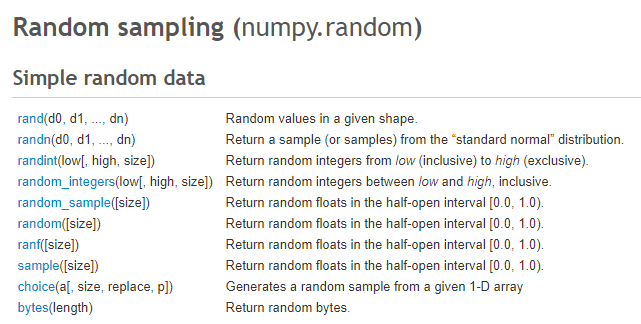

In this section we are going to discuss each of these functions and investigate how they can be used.

***

### numpy.random.rand

The numpy.random.rand function returns a Numpy array containing numbers drawn from the standard uniform distribution between the values of 0 and 1. A uniform distribution in statistics is a probability distribution in which all outcomes are equally as likely.([7](https://www.britannica.com/topic/uniform-distribution-statistics))

 

In [2]:
# Import Python packages.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd


In [3]:
# Define the style to be used.
plt.style.use('seaborn')

In [4]:
# Define pyplot figure size
plt.rcParams['figure.figsize'] = [18, 12]

In [5]:
# create a one dimensional array with 10 elements.
x = np.random.rand(10)
# Show array contents and attributes of the array.
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)


[0.76459359 0.98274813 0.70770626 0.95665095 0.56098077 0.80728272
 0.69894593 0.03223201 0.21312465 0.85609904]
The number of dimensions in the array =  1
The shape of the array =  (10,)
The number of elements in the array =  10


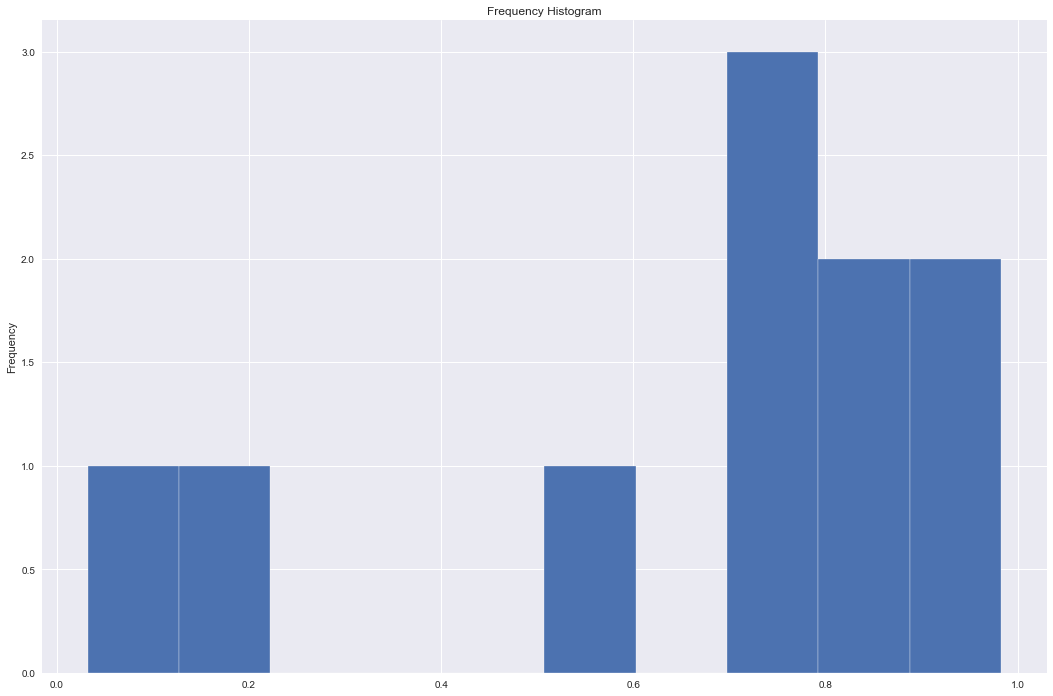

In [6]:
# Create the histogram with 10 bins.
plt.hist(x, bins=10, edgecolor='white')
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()


<br>
Our array (x) has 1 dimension, 10 elements and a shape of (10,). The distribution of the data in the histogram should be uniform - i.e the probability of getting each value should be the same however, with a small sample size (10 values) this may not be apparent. Let's try the same thing with a much larger number of samples:

In [7]:
# create a one dimensional array with 1000000 elements.
y = np.random.rand(1000000)
# Show array contents and attributes of the array.
print(y)
print("The number of dimensions in the array = ", y.ndim)
print("The shape of the array = ", y.shape)
print("The number of elements in the array = ", y.size)

[0.56925271 0.03125634 0.71724302 ... 0.58926242 0.74901933 0.20743438]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000


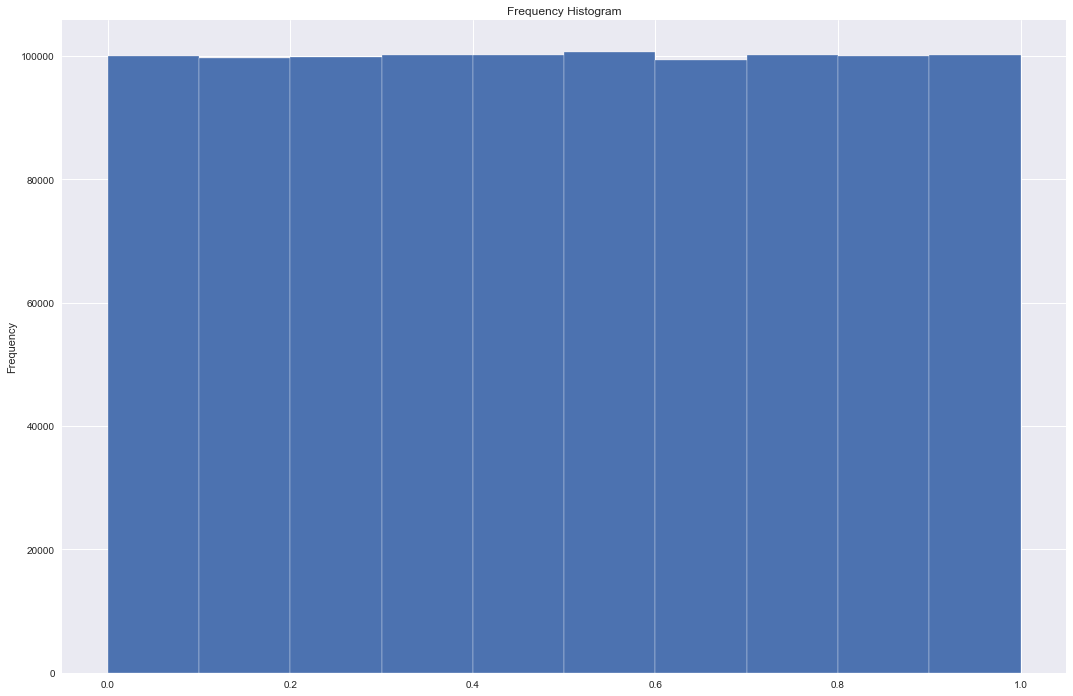

In [8]:
# Create the histogram with 10 bins.
plt.hist(y, bins=10, edgecolor='white')
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

<br>

With a sample size of one million elements we now see that our random data is more closley approximating the uniform distribution.


In the above example we created a one dimensional Numpy array. We can also create multi-dimensional arrays.

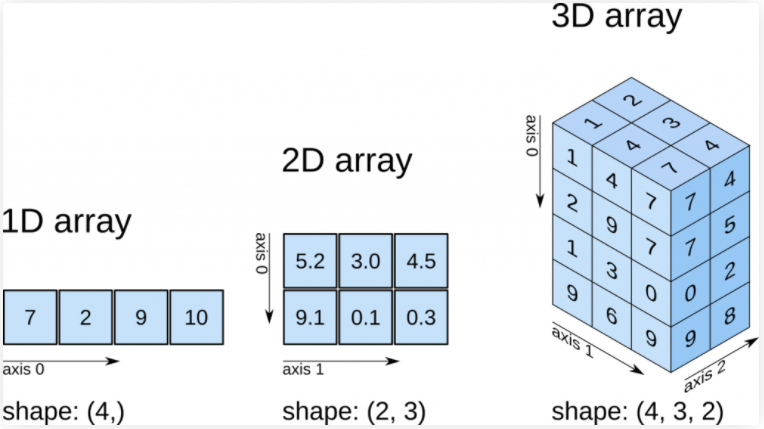

In [9]:
# Generating a two dimensional array
x = np.random.rand(2, 5)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)

[[0.00860222 0.24812246 0.41605779 0.34293055 0.48969728]
 [0.76701521 0.95321697 0.45248587 0.87774748 0.751474  ]]
The number of dimensions in the array =  2
The shape of the array =  (2, 5)
The number of elements in the array =  10


In [10]:
# Generating a three dimensional array
x = np.random.rand(2, 3, 5)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)

[[[2.37929180e-01 6.39724905e-04 6.83205863e-01 3.72965191e-01
   6.83909424e-01]
  [1.20625078e-01 2.93415490e-01 9.88076689e-01 1.05666567e-01
   9.96098315e-01]
  [1.50130675e-01 1.29076731e-01 2.20312115e-01 8.86690050e-02
   1.03844650e-02]]

 [[7.02777070e-01 8.26213296e-01 9.42191294e-01 1.47057687e-01
   2.61327258e-01]
  [3.78843749e-02 6.73654619e-01 7.97778532e-01 8.47814489e-02
   6.15357302e-01]
  [6.60834927e-01 6.65040344e-01 1.68974867e-01 5.16545500e-01
   4.28043663e-01]]]
The number of dimensions in the array =  3
The shape of the array =  (2, 3, 5)
The number of elements in the array =  30


<br>

## numpy.random.randn

***


Where the <code>numpy.random.rand</code> function returns an array containing numbers drawn from the standard uniform distribution, the <code>numpy.random.randn</code> function returns an array containing numbers drawn from the standard normal distribution.
The standard normal distribution is a normal distribution with a mean of 0 and a standard deviation of 1:

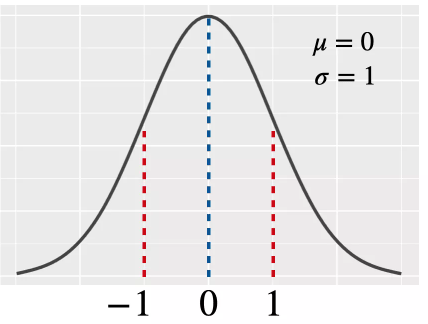

As with the numpy.random.rand function, we can pass different values to the numpy.random.randn function to control the number of elements and dimensions in the array.

In [11]:
# create a one dimensional array with 1000000 elements drawn from the standard normal distribution.
x = np.random.randn(1000000)
# Show array contents and attributes of the array.
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)
print("The mean of elements in the array = ", x.mean())
print("The standard deviation of elements in the array = ", x.std())


[ 0.09878124 -0.25014027 -0.63958156 ...  0.2928612   2.61216044
 -0.6016058 ]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000
The mean of elements in the array =  0.00047714054887845866
The standard deviation of elements in the array =  0.9998925389419127


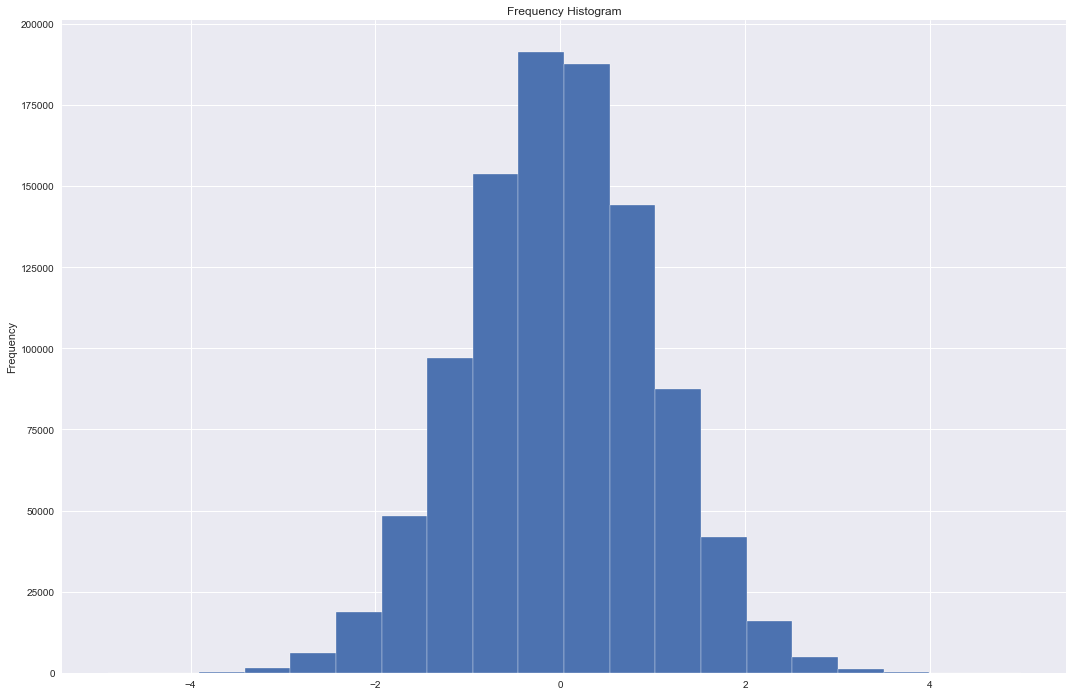

In [12]:
# Create the histogram with 20 bins.
plt.hist(x, bins=20, edgecolor='white')
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

In [13]:
from scipy.stats import shapiro
# Test normality of the numpy.random.randn array
stat, p = shapiro(x)
print("P-value = ", p)
# interpret p-value at an alpha level of 0.05
alpha = 0.05
if p > alpha:
	print('Sample data appears to be from the normal distribution (fail to reject H0)')
else:
	print('Sample does not appear to be from the normal distribution(reject H0)')

P-value =  1.0
Sample data appears to be from the normal distribution (fail to reject H0)


C:\Users\stracey\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<br>

## numpy.random.randint

***

The previous two numpy.random functions have drawn samples from specific distributions that have pre-defined upper and lower limits. The <code>numpy.random.randint</code> like the <code>numpy.random.rand</code> function draws samples from the discrete uniform distribution but unlike we are able to specify low limits and high limits for the samples. Another difference between the <code>numpy.random.randint</code> function and the numpy.random.rand function is that the array returned consists of integers rather than float values.([8](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html))

There are 4 possible parameters that we can pass to the <code>numpy.random.randint</code>: (low, high, size, dtype)

- Low: Lowest integer to be drawn from the distribution (inclusive).
- High (optional): One above the higest integer to be drawn from the distribution (exclusive)
- Size: Output shape of the array.
- dtype: Data type of the array to be returned. The default value is integer.

In [14]:
# Dice rolling Simulation
# Define the number of rolls of the dice.
rolls = 100000
# create a one dimensional array of random samples with a low value of 1, a high value of 6 and 100000 elements
dice = np.random.randint(1, 7,  rolls)
# Look at a sample of the integers in the array
dice


array([4, 1, 1, ..., 5, 1, 2])

In [15]:
# Count the number of times each score appears
score, counts = np.unique(dice, return_counts = True)
score, counts

(array([1, 2, 3, 4, 5, 6]),
 array([16714, 16745, 16669, 16565, 16742, 16565], dtype=int64))

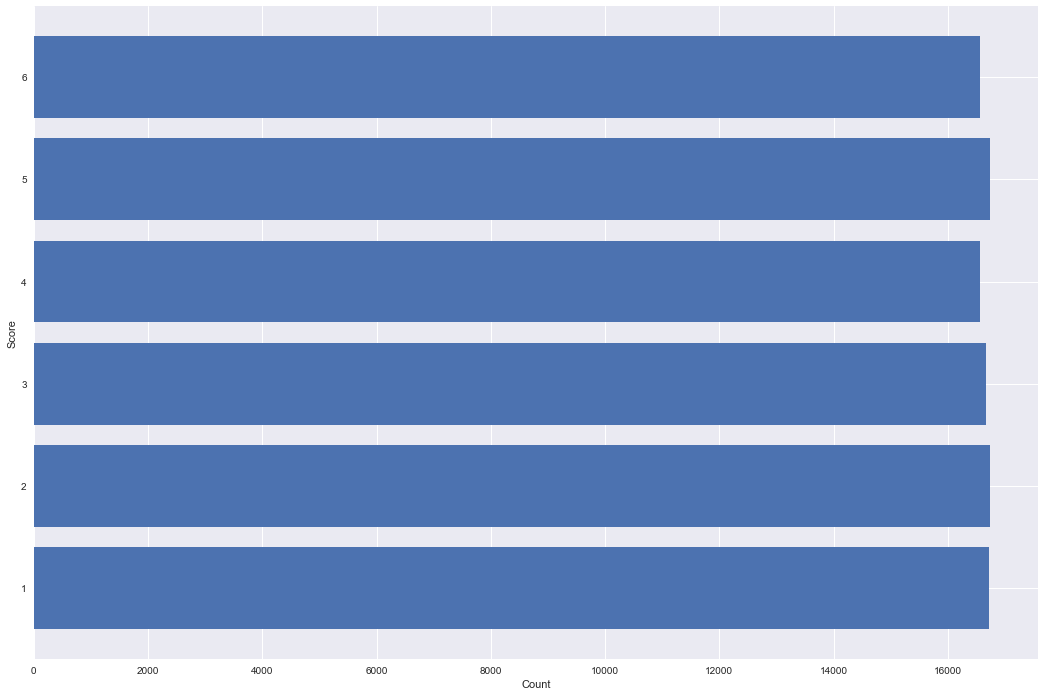

In [16]:
# Create a new plot
fig, ax = plt.subplots()
# Bar Chart
ax.barh(score, counts)
# Set axis labels
ax.set_ylabel('Score')
ax.set_xlabel('Count');
plt.show()

<br>

It is also possible to create multi-dimensional arrays. To continue with the dice rolling simulation, if we wanted to simulate the rolling of two die we could create a two dimensional numpy.random.randint array:

In [17]:
# The number of dice to roll in each turn.
no_dice = 2
# The number of turns.
no_turns =10000
# Roll the dice.
dice = np.random.randint(1, 7, (no_turns, no_dice))
# Have a look at dice.
dice

array([[1, 4],
       [3, 3],
       [6, 1],
       ...,
       [4, 1],
       [6, 2],
       [2, 4]])

<br>

## numpy.random.choice

***

The <code>numpy.random.choice</code> function generates a random sample taken from a one dimendional array or a range of integers. There are 4 parameters that can be passed to the function: (a, size, replace, p).

- a: A one dimensional array or integer. If an integer is used, the random choice will be from 0 up to (but not including) the integer value.
- size: The shape of the data returned.
- replace: Whether the sample is performed with or without replacement.
- p: The probabilities associated with each entry in a.

In [18]:
# Generate random lottery numbers.
# Create a numpy array with values from 1 to 50.
num_balls = np.arange(1,51,1)
# Define the number of numbers to generate.
num_choices = 6
# Create array containing random choices without replacement (i.e you cannot draw the same ball twice)
lottery_numbers = np.random.choice(num_balls, num_choices, replace=False)
print(lottery_numbers)

[ 2 38 43 24 31 28]


<br>

## numpy.random.random_sample

***

The documentation for the <code>numpy.random.random_sample</code> function indicates that it returns "Random floats in the half-open interval (0.0, 1.0)" from the continuous uniform distribution. The half-open interval is a mathematical term meaning that one endpoint is included but not the other ([9](https://mathworld.wolfram.com/Interval.html)). In other words, the elements returned by the numpy.random.random_sample function will be samples from 0.0 (inclusive) up to, but not including, 1.0.

The following numpy functions are all aliases of the <code>numpy.random.random_sample</code> function:

- <code>numpy.random.random</code>
- <code>numpy.random.ranf</code>
- <code>numpy.random.sample</code>



In [19]:
# Return a single sample from the continuous uniform distribution
np.random.random_sample()

0.5519986631250778

In [20]:
# Create an ndarray of 1000000 elements using the numpy.random.random function.
x = np.random.random_sample(1000000)
print(x)
print("The number of dimensions in the array = ", x.ndim)
print("The shape of the array = ", x.shape)
print("The number of elements in the array = ", x.size)
print("The mean of elements in the array = ", x.mean())
print("The standard deviation of elements in the array = ", x.std())

[0.25398951 0.62580036 0.45656542 ... 0.97607608 0.30987966 0.18612572]
The number of dimensions in the array =  1
The shape of the array =  (1000000,)
The number of elements in the array =  1000000
The mean of elements in the array =  0.5001358830218611
The standard deviation of elements in the array =  0.2890589687859897


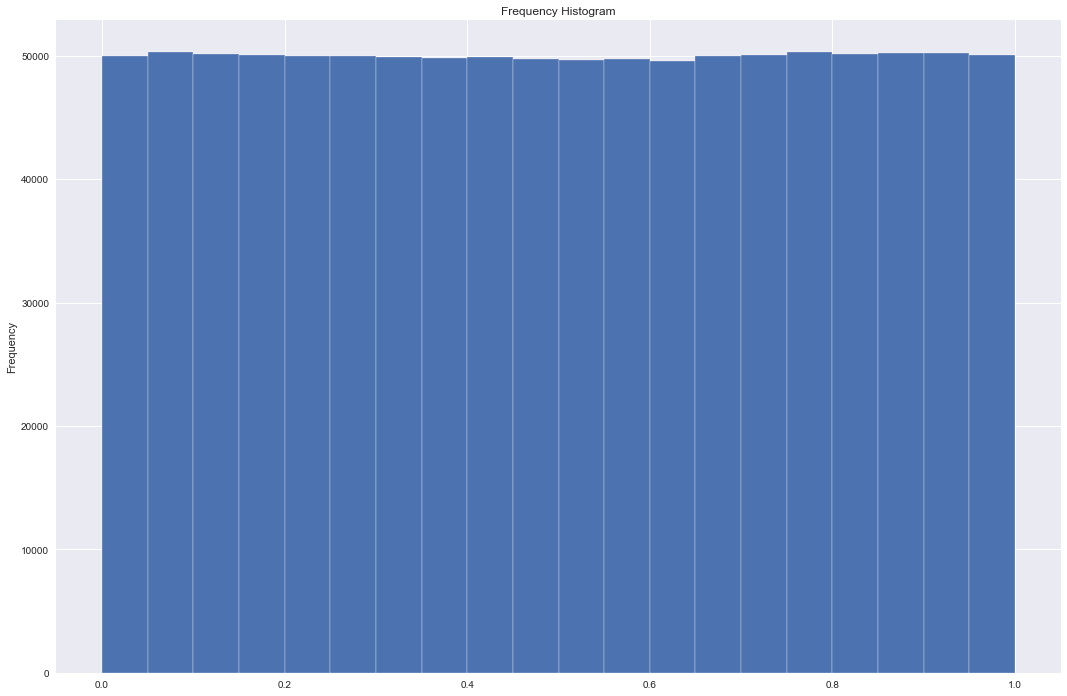

In [21]:
# Visualize the distribution.
# Create the histogram with 20 bins.
plt.hist(x, bins=20, edgecolor='white')
# Set the title and y-axis label
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.show()

<br>

As we can see the returned ndarray approximates the continuous uniform distribution.

In [22]:
# Creating a two dimensional array using numpy.random.random_sample.
np.random.random_sample((3,2))

array([[0.24533406, 0.2468786 ],
       [0.78069742, 0.33983666],
       [0.92706739, 0.38883293]])

<br>

## numpy.random.bytes

***

The <code>numpy.random.bytes</code> function takes a length parameter and returns a string of bytes of that length. The bytes class in Python is a binary serialisation format represented by a sequence of eight bit integers with which you can store data on the file system or transmit via the internet. The byte class can only contain ASCII literal characters. Since the release of Python 3, the bytes class is always preceded with a b'. Since PEP 3137, the bytes object is immutable i.e it's state cannot be modified after it is created.([10](https://www.python.org/dev/peps/pep-3137/))

In [23]:
# Create a random bytes object of length 10.
x = np.random.bytes(10)
# Print information about x
print(x)
print(type(x))

b'}c\x1a\x05\xa7\xe3\xaeC\xa6\xbd'
<class 'bytes'>


<br>

## Permutation Functions.

***

A permutation is the rearrangement of an ordered list. The number of permutations for a list of length n is dentoed by the mathematical formula n! (n factorial). In other words, if you have a list of length 5, the number of possible permutations (number of different orders) is 5! (5x4x3x2x1) = 120.

Python has two different functions which deal with permutations:

- <code>numpy.random.shuffle</code>
- <code>numpy.random.permutation</code>


The key difference between these two functions is that <code>numpy.random.shuffle</code> makes changes to the original array i.e it modifies the sequence *in-place* whereas the numpy.random.permutation function returns a re-arranged array and leaves the original array un-changed.([11](https://www.w3schools.com/python/numpy/numpy_random_permutation.asp)) In both functions, if the original array is multi-dimensional, the rearrangement only occurs along the first index.


In [24]:
# Create two arrays
x = np.arange(5)
y = np.arange(5)
print('x = ', x)
print('y = ', y)

x =  [0 1 2 3 4]
y =  [0 1 2 3 4]


In [25]:
# Call the permutation function on array y
print(np.random.permutation(y))
# Print out elements of array y
print('y = ', y)

[4 0 1 2 3]
y =  [0 1 2 3 4]


In [26]:
# Call the shuffle function on array x.
print(np.random.shuffle(x))
# Print out elements of array x.
print('x = ', x)

None
x =  [0 1 4 3 2]


<br>

From the code results above you can see that the <code>numpy.random.permutation</code> function returns a permuted sequence while leaving the order of the orginal array unchanged. The <code>numpy.random.shuffle</code> function on the other hand makes the order change in-place - i'e the original array is re-ordered and returned.

In [27]:
# Define a multi-dimensional array ranging from 0 to 14.
multi_shuffle = np.arange(15).reshape((3, 5))
multi_shuffle

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [28]:
# Re-order array using shuffle function.
np.random.shuffle(multi_shuffle)
multi_shuffle

array([[10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4]])

In [29]:
# Define a multi-dimensional array ranging from 0 to 14.
multi_permutation =  np.arange(15).reshape((3, 5))
multi_permutation

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [30]:
# Re-order array using permutation function.
print(np.random.permutation(multi_permutation))

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [ 5  6  7  8  9]]


When applying either permutation or shuffle on a multi-dimensional array, you can see that the re-ordering only takes place on axis 0 of the array (vertically)

<br>

## Explain the use and purpose of at least five “Distributions” functions.

***

Probability and statistics are the foundations of data science and the underlying principles of both data science and machine learning rely heavily on statistical mathematics and linear algebra.([12](https://www.datacamp.com/community/tutorials/probability-distributions-python))

A probability distribution is a summary of probabilities for the values of a random variable. It is a staticitcal function that decribes all possible values that the random variable can take within a given range. It is important when discussing probability distributions to differentiate between discrete and continuous random variabes:

- A discrete random variable is one which can only take on specific, countable number of distinct values. e.g. When rolling a (fair) dice there 6 possible values in a single roll and each value has the same probability of occurring (0.16667).
- A continuous random variable is one which can take an infinite number of potential vlaues. Continuous random variables are often measurements (e.g. height, weight, temperature).

NumPy has an extensive list of distributions from which we can generate data:

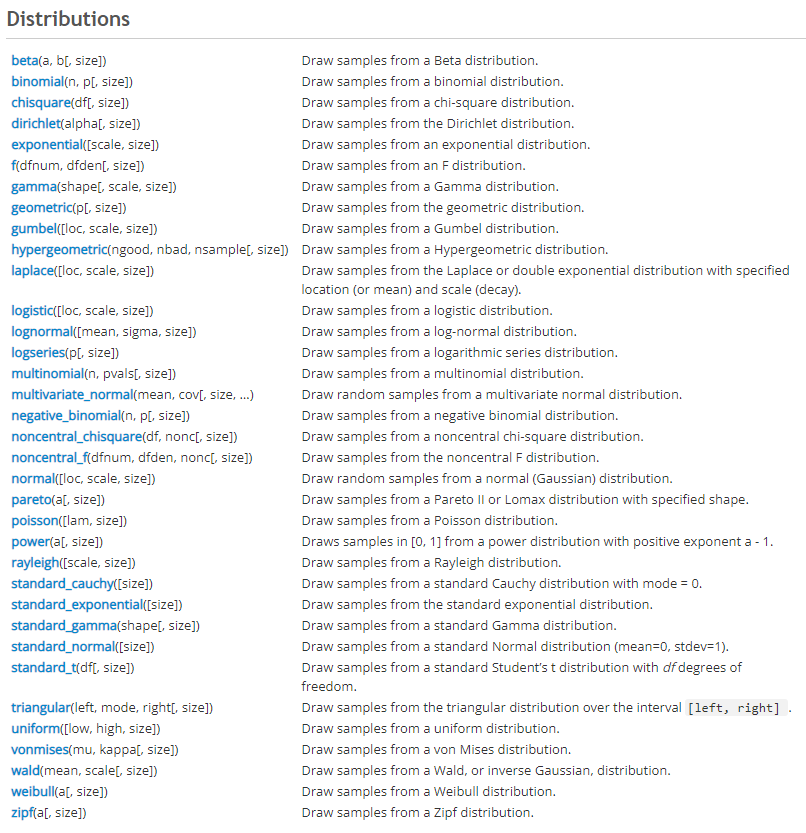

For the purpose of this project we are going to review five of the listed distributions:

1. Normal Distribution (Draw random samples from a normal (Gaussian) distribution.)
2. Exponential Distribution (Draw samples from an exponential distribution.)
3. Uniform (Draw samples from a uniform distribution.)
4. Weibull (Draw samples from a Weibull distribution.)
5. Binomial (Draw samples from a binomial distribution.)

<br>

## Normal Distribution

***


The <code>numpy.random.normal(loc=0.0, scale=1.0, size=None)</code> function draws random samples from the normal (Gaussian) distribution. The normal distribution has certain key parameters:

- µ, representing the mean of the distribution and defined using the loc parameter
- σ, representing the standard deviation or spread of the data and defined using the scale paramter.

According to the NumPy documentation:
>The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random >disturbances, each with its own unique distribution.

When plotted, the normal distribution takes on a distinctive "bell curve" shape defined by its mean and standard deviation. According to [Wolfram](https://mathworld.wolfram.com/NormalDistribution.html) it is common for mathematicians to refer to the distribiution as the "normal distribution", for physicists to refer to it as the "Gaussian distribution" and for Social scientists to refer to it as the "Bell curve". In my industry (industrial manufacturing) it is ubiquitously referred to as the normal distribution.

- Approximately 68% of the data will occur within one standard deviation from the mean.
- Approximately 95% of the data will occur within two standard deviations from the mean.
- Approximately 99.7% of the data will occur within three standard deviations from the mean.

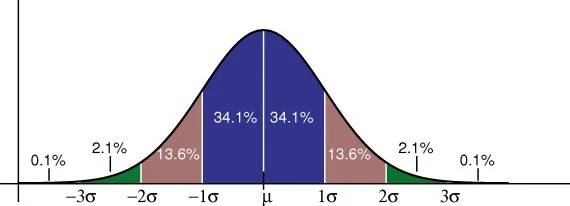

***

<br>

### Evaluating the <code>numpy.random.normal(loc)</code> parameter.

loc is an optional parameter which can be passed to the <code>numpy.random.normal</code> function that specifies the mean (peak) of the distribution. The default value is 0.0 i.e if no value is specified for loc then the array returned will be sampled from the normal distribution with a mean of 0.


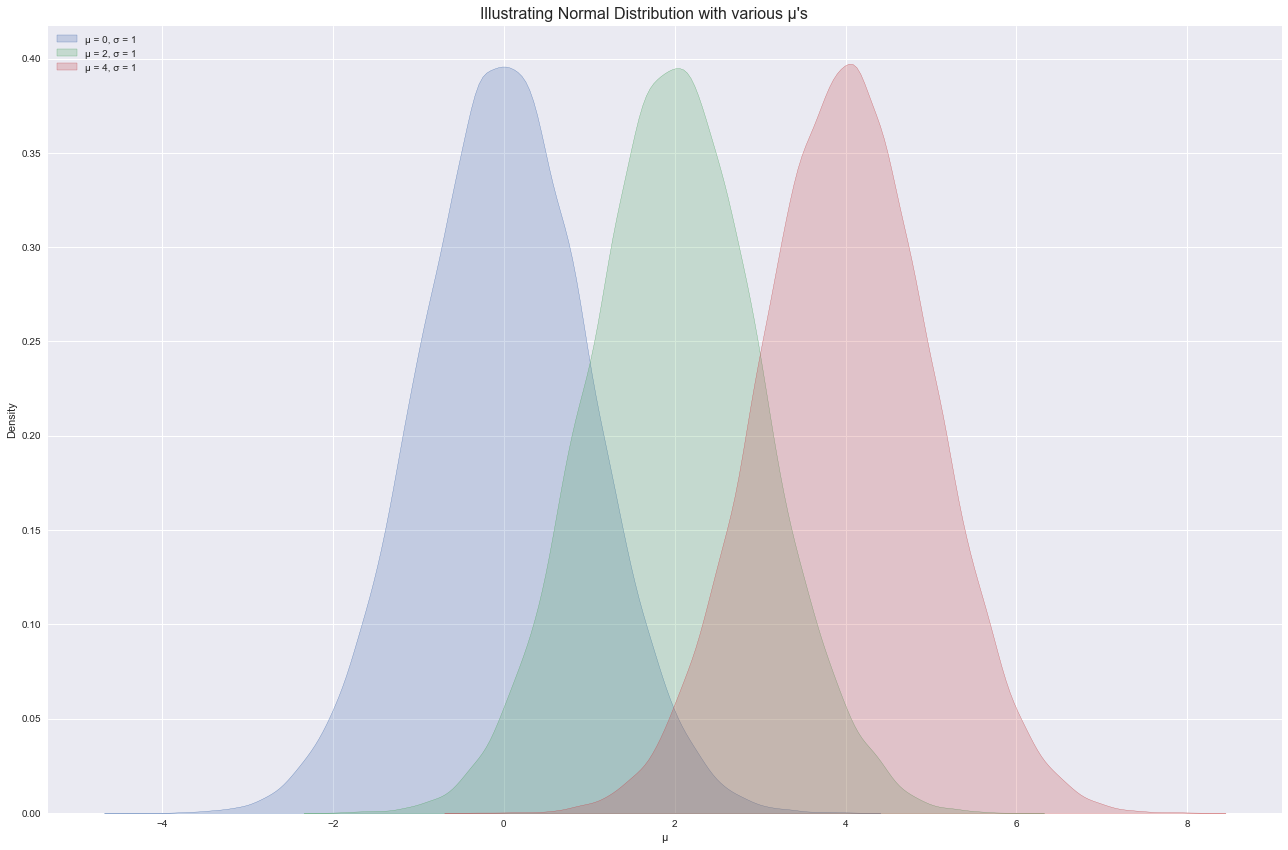

In [31]:
# Illustrating the impact of loc
# Define 3 ndarrays with varying mean values
arr1 = np.random.normal(0, 1, 50000)
arr2 = np.random.normal(2, 1, 50000)
arr3 = np.random.normal(4, 1, 50000)

# use seaborn kdeplot functions to plot differnt loc(mean) distributions
sns.kdeplot(arr1, fill = True, label = 'µ = 0, σ = 1')
sns.kdeplot(arr2, fill = True,  label = 'µ = 2, σ = 1')
sns.kdeplot(arr3, fill = True, label = 'µ = 4, σ = 1')
# Define graph legend, labels and layout
plt.legend(loc='upper left')
plt.xlabel('µ')
plt.suptitle("Illustrating Normal Distribution with various µ's", fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

<br>

As can be seen from the above example, changing the loc parameter in the <code>numpy.random.normal</code> changes the average value of the distribution. In the above plot you can see that the location of the peak moves along the x-axis as the loc parameter is increased from 0 to 4.

One property of the normal distribution is that the mean should be almost identical to the median and the skewness should be close to zero. Skewness in statistics is a measure of the lack of symmetry ([14](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)).

We can evaluate the mean, median and skewness of our ndarrays as follows.



In [32]:
# Print mean, median and skew values for each array.

print(f'The mean of arr1 is {np.mean(arr1)}, the median of arr1 is {np.median(arr1)}, the skew of arr1 is {stats.skew(arr1)}')
print(f'The mean of arr2 is {np.mean(arr2)}, the median of arr1 is {np.median(arr2)}, the skew of arr1 is {stats.skew(arr2)}')
print(f'The mean of arr3 is {np.mean(arr3)}, the median of arr1 is {np.median(arr3)}, the skew of arr1 is {stats.skew(arr3)}')

The mean of arr1 is -0.002372336863087566, the median of arr1 is -0.0020396782921506323, the skew of arr1 is 0.0008079859130761597
The mean of arr2 is 1.9997443202415597, the median of arr1 is 1.9941126518605121, the skew of arr1 is 0.023112090032304466
The mean of arr3 is 3.997346512495609, the median of arr1 is 3.999343804007581, the skew of arr1 is -0.004580411385930122


***

<br>

### Evaluating the <code>numpy.random.normal(scale)</code> parameter.

scale is also an optional parameter which can be passed to the <code>numpy.random.normal</code> function that specifies the standard deviation (width & flatness) of the distribution. The default value is 1.0 i.e if no value is specified for loc then the array returned will be sampled from the normal distribution with a standard deviation of 1. Unlike loc, scale cannot be a negative value.

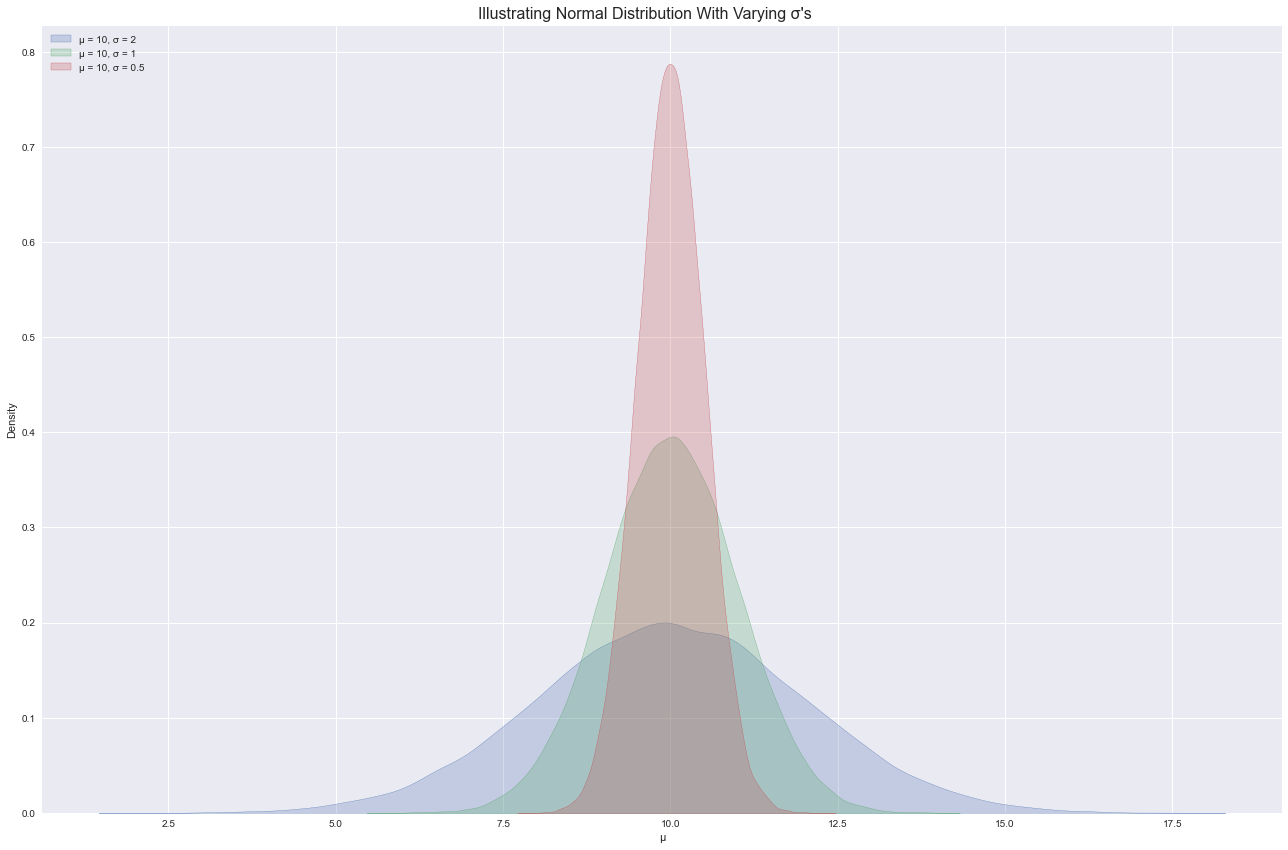

In [33]:
# Illustrating the impact of scale
# Define 3 ndarrays with varying standard deviation (scale) values
sigma1 = np.random.normal(10, 2, 50000)
sigma2 = np.random.normal(10, 1, 50000)
sigma3 = np.random.normal(10, 0.5, 50000)

# using seaborn kdeplot to plot different scale(standard deviation) distributions
sns.kdeplot(sigma1, fill = True, label = 'µ = 10, σ = 2')
sns.kdeplot(sigma2, fill = True,  label = 'µ = 10, σ = 1')
sns.kdeplot(sigma3, fill = True, label = 'µ = 10, σ = 0.5')
# Define graph legend, labels and layout
plt.legend(loc='upper left')
plt.xlabel('µ')
plt.suptitle("Illustrating Normal Distribution With Varying σ's", fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

The chart above illustrates the effect of changing the scale parameter of the <code>numpy.random.normal</code> function. As you increase the value of scale, the distibution becomes flatter and wider. Standard deviation is a measure of how dispersed the data is from the mean. A lower standard deviation (scale) means data are clustered around the mean value whereas a higher standard deviation (scale) means the data are more spread out.([15](https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod8_sd.html))

The mean with a sample size of 10 is: 5.049221461173118
The mean with a sample size of 100 is: 5.107745986640086
The mean with a sample size of 10000 is: 4.977415293730931


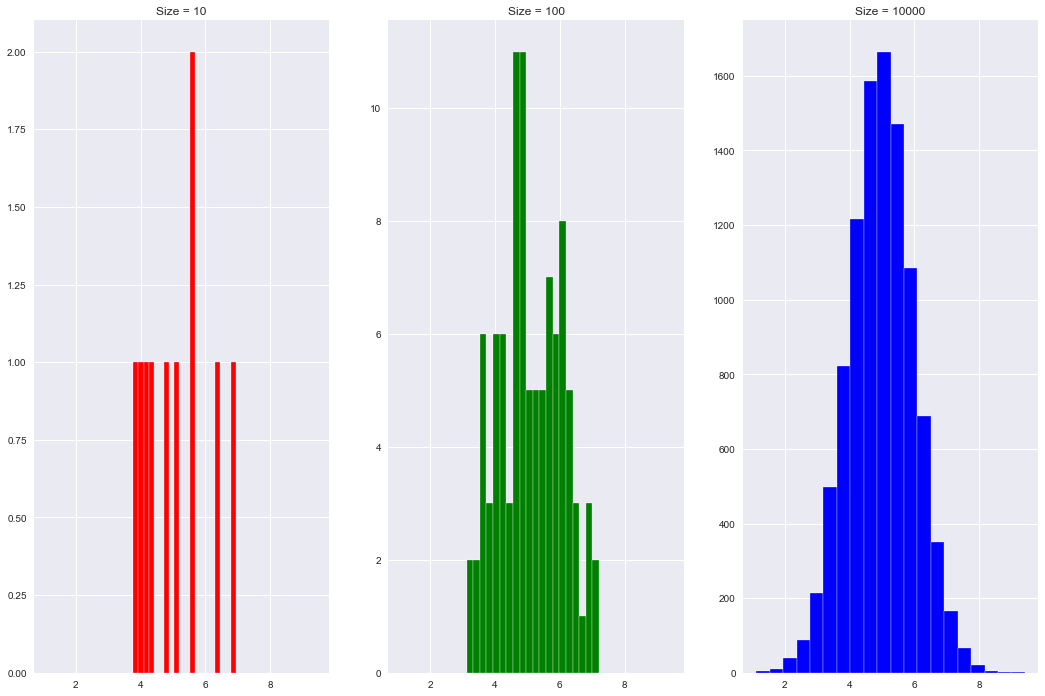

In [34]:
# Illustrating the impact of Size
# Define 3 ndarrays with varying Sizes
arr1 = np.random.normal(5, 1, 10)
arr2 = np.random.normal(5, 1, 100)
arr3 = np.random.normal(5, 1, 10000)


fig, axs = plt.subplots(1, 3, sharex=True)

axs[0].hist(arr1, bins=20, edgecolor='white', color='red')
axs[0].title.set_text('Size = 10')
axs[1].hist(arr2, bins=20, edgecolor='white', color='green')
axs[1].title.set_text('Size = 100')
axs[2].hist(arr3, bins=20, edgecolor='white', color='blue')
axs[2].title.set_text('Size = 10000')


print(f'The mean with a sample size of 10 is: {arr1.mean()}')
print(f'The mean with a sample size of 100 is: {arr2.mean()}')
print(f'The mean with a sample size of 10000 is: {arr3.mean()}')

The chart above illustrates the effect of changing the size parameter of the <code>numpy.random.normal</code> function. With a low sample size we do do not adequately estimate the dispersion of data but as we increase the sample size we see that the distribution chart begins to conform to the bell curve that is expected.

<br>

## Real World Example of Using <code>numpy.random.normal</code>

***

In almost all industries it is overly expensive and time consuming to collect data on an entire population. In this scenario we would take a sample of the population with sufficient size and power to ensure that inferences made from the sample are representative of the popuation as a whole.

For example, take the following table which defines the Anthropometric measurements of Irish children in 2019:([13](https://doi.org/10.1017/S1368980020000920))


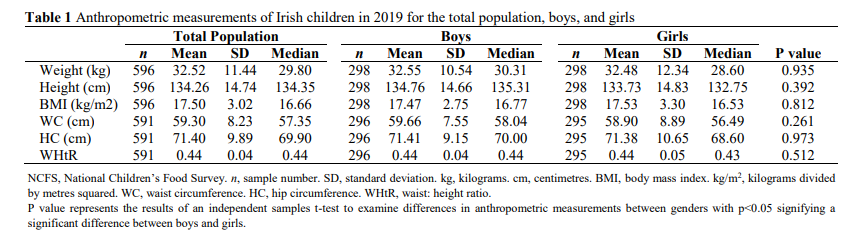

The authors have used a sample size of 596 children (298 boys and 298 girls) to infer information regarding the entire population of Irish children. With this data we can now create visualisations using <code>numpy.random.normal</code> and test different hypothesis using <code>scipy.stats</code>.

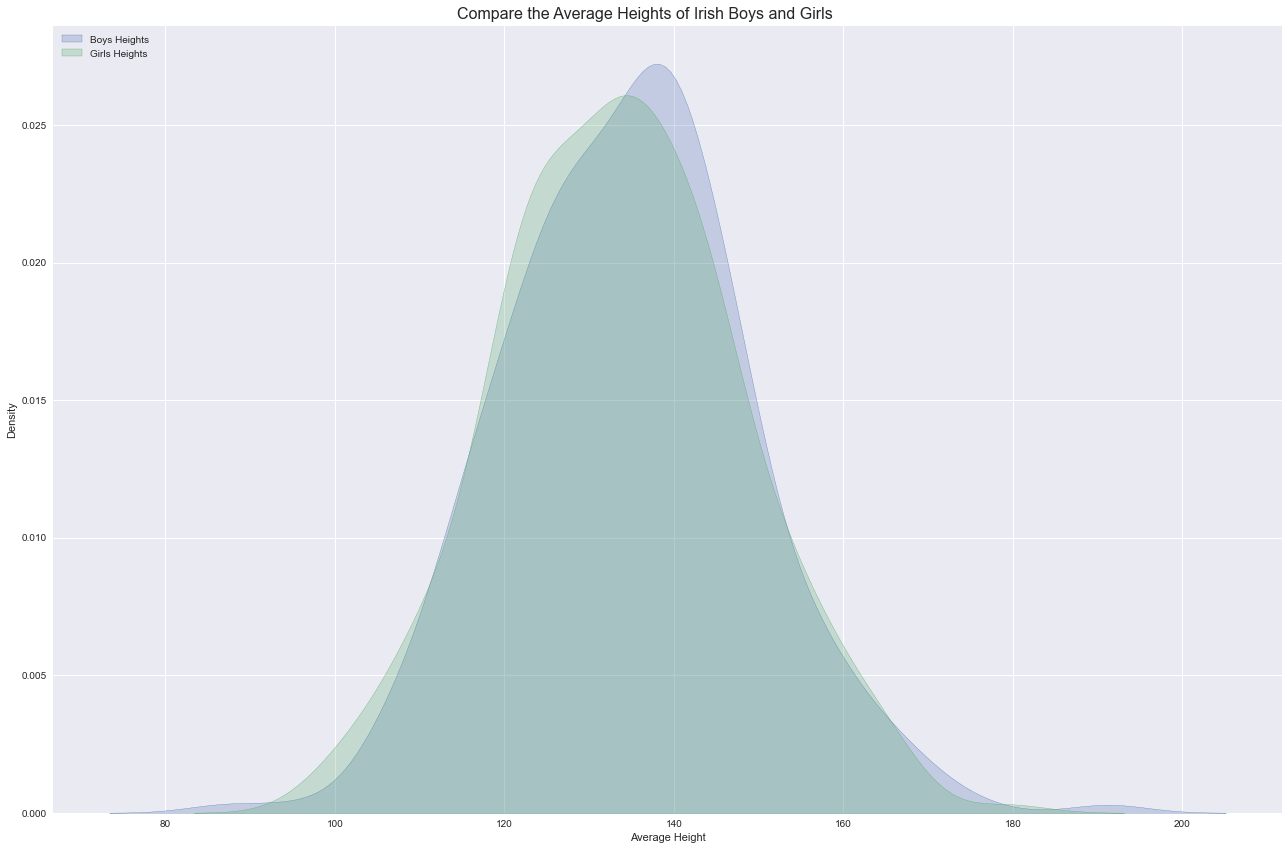

In [35]:
# Use seed to ensure same array is returned on each run.
np.random.seed(42)
# Define ndarray of boys and girls heights using mean and SD from above table.
height_boys = np.random.normal(134.76, 14.66, 298)
height_girls = np.random.normal(133.73, 14.83, 298)

# Plot the distributions.
sns.kdeplot(height_boys, fill = True, label = 'Boys Heights')
sns.kdeplot(height_girls, fill = True,  label = 'Girls Heights')
# Define chart properties.
plt.legend(loc='upper left')
plt.xlabel('Average Height')
plt.suptitle('Compare the Average Heights of Irish Boys and Girls', fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

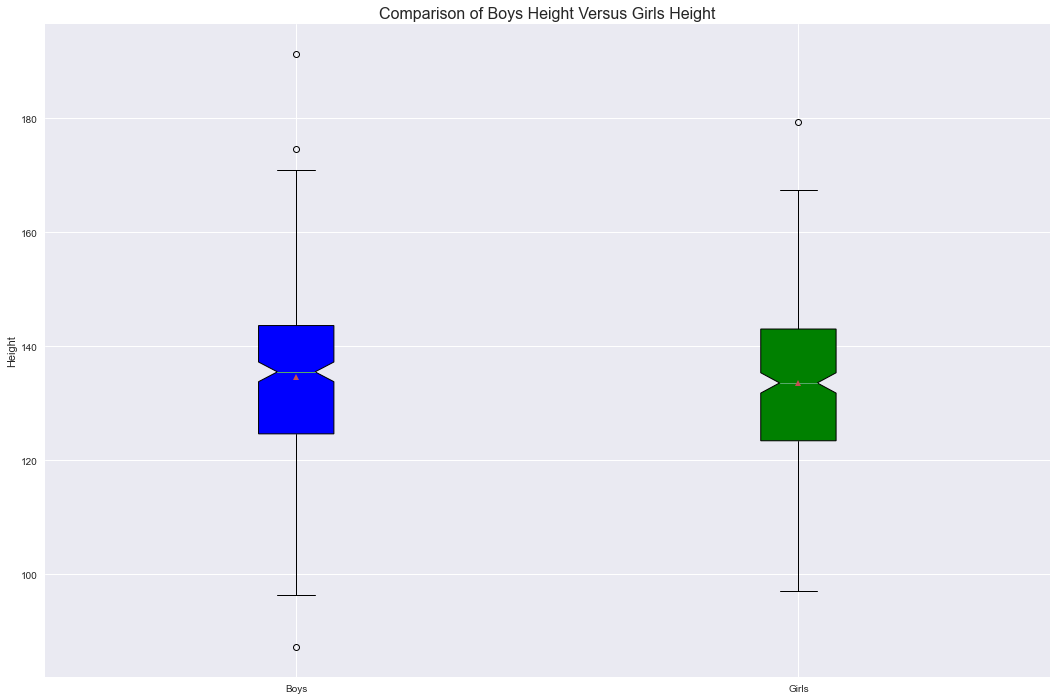

In [36]:
# define columns to be used in box plot
columns = [height_boys, height_girls]
# Initialise subplot.
fig, ax = plt.subplots()
box = ax.boxplot(columns, notch=True, patch_artist=True, showmeans=True)
# Define colours for each box
colors = ['blue', 'green']
# Loop over boxes and specify colour to fill
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Define chart properties. 
plt.title('Comparison of Boys Height Versus Girls Height', fontsize=16)
plt.ylabel('Height')
plt.xticks([1, 2], ['Boys', 'Girls'])

plt.show()



In [37]:
# Is there a statistical difference in the height of boys versus girls?
# Null hypothesis: Boys height and girls height are the same.
stat, p = stats.ttest_ind(height_boys, height_girls)
print(f'Statistics = {stat}, p = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('The distributions are the same (fail to reject H0)')
else:
    print('The distributions are not the same (reject H0)')

Statistics = 0.9006190831790706, p = 0.3681558739355917
The distributions are the same (fail to reject H0)


<br>

## Exponential Distribution

***


The <code>random.exponential(scale=1.0, size=None)</code> function draws random samples from the exponential distribution. The exponential distribution has one 
key parameter:

- λ (lambda) is the rate parameter and it determines the constant average rate at which an event occurs. We pass the inverse of λ to the <code>random.exponential(scale=1.0, size=None)</code> function


According to the NumPy documentation:
> The exponential distribution is a continuous analogue of the geometric distribution. It describes many common situations, such as the size of raindrops measured over many 
> rainstorms [1], or the time between page requests to Wikipedia [2].

In other words, the exponential distribution describes the time between independent events which occur at a constant average rate. In physics, for example, the exponential distribution is often used to measure radioactive decay. In engineering we use the exponential distribution to determine the time associated with receiving a defective part in our production lines.

The exponential distribution curve when plotted is always convex and stretches further to the right as λ decreases in value ([16](https://reliawiki.org/index.php/The_Exponential_Distribution)):

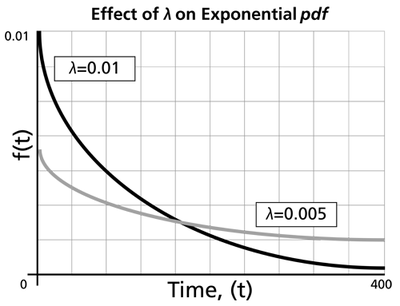





***

<br>

### Evaluating the <code>numpy.random.exponential(scale)</code> parameter.

scale is an optional parameter that can be passed to the  <code>numpy.random.exponential</code> function and represents the mean of the exponential distribution from which random samples will be drawn. The mean of the exponential distribution is 1/λ - i.e 1 divided by the rate parameter. The scale parameter cannot be a negative value.

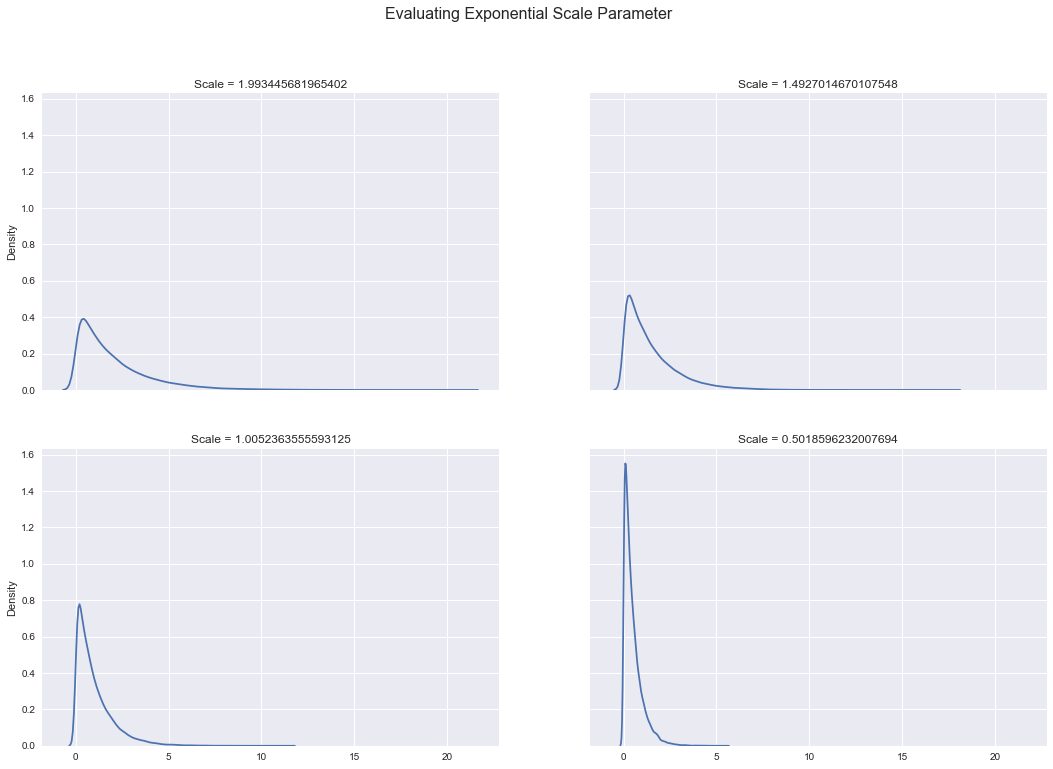

In [38]:
# Illustrating the impact of scale
# Define 3 ndarrays with varying scale values
exp1 = np.random.exponential(2, 50000)
exp2 = np.random.exponential(1.5, 50000)
exp3 = np.random.exponential(1, 50000)
exp4 = np.random.exponential(0.5, 50000)

# Create figure and define subplots.
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
fig.suptitle('Evaluating Exponential Scale Parameter', fontsize = 16)

# Plt each array in a kde subplot.
ax1 = sns.kdeplot(exp1, shade=False, ax=axs[0,0])
ax1.title.set_text(f'Scale = {np.mean(exp1)}')
ax2 = sns.kdeplot(exp2, shade=False, ax=axs[0,1])
ax2.title.set_text(f'Scale = {np.mean(exp2)}')
ax3 = sns.kdeplot(exp3, shade=False, ax=axs[1,0])
ax3.title.set_text(f'Scale = {np.mean(exp3)}')
ax4 = sns.kdeplot(exp4, shade=False, ax=axs[1,1])
ax4.title.set_text(f'Scale = {np.mean(exp4)}')






<br>

The scale parameter determines how quickly the probabilities for higher values decreases for example, if we were modelling wait times, a lower scale value would be beneficial as the mean time for waiting would be less than it would be if the scale were higher. In other words, the scale value determines the skew of the distribution. 

<br>

## Real World Example of Using <code>numpy.random.exponential</code>


The exponential is widely used in the real world to model time *until* an event - such as failure, arrival, success etc. In industry we use the exponential distribution to illustrate key performance metrics such as mean time between failure (MTBF) of equipment or parts produced. For example we might collect data on the number of years it takes for a manufactured part to fail. Using this data we can estimate the probability of a part failing in a certain time period.

Text(5.5, 0.125, '5 years')

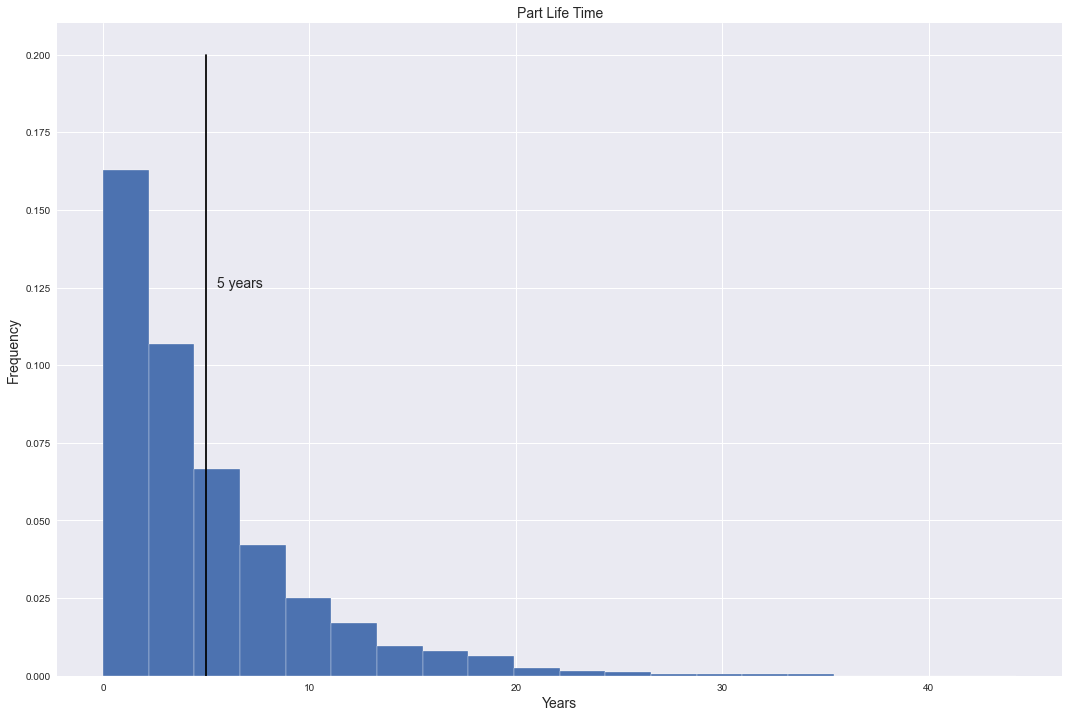

In [135]:
# Plot the exponential distribution of mean time until failure for a part.
# Average life time of part.
life = 5
# Number of parts evaluated.
size = 5000

# Define ndarray using numpy.exponential
data = np.random.exponential(life, size)
count, bins, ignored = plt.hist(data, 20, density=True, label='Mean', edgecolor='white')

# Define titles.
plt.title('Part Life Time', size=14)
plt.xlabel('Years', size=14)
plt.ylabel('Frequency', size=14)

# Add vertical line and text to figure.
plt.plot([5, 5], [0, 0.2], 'k-')
plt.text(5.5, 0.125, '5 years', size=14)


In [40]:
# Calculate the probability of a part failing in less than three years
# Define variables to be used in expon.cdf function
avg_life = 5
scale = 1/life
test = 3

# Calculate probability
cdf = stats.expon.cdf(test, scale, avg_life)

print(f'The probability that a part will fail in three years or less is {cdf}')
    




The probability that a part will fail in three years or less is 0.42879093615118513


***
<br>

## Uniform Distribution

The <code>random.uniform(low=0.0, high=1.0, size=None)</code> function draws random samples from the continuous uniform distribution over the half open interval. The uniform distribution has three possible parameters:

- Low: The lower bondary of the output interval.
- High: The upper boundary of the output interval.
- Size: The output shape.

So to use the <code>random.uniform(low=0.0, high=1.0, size=None)</code> function we simply specify a lower number, upper number and size. The function will then provide samples from this interval from (and including) the lower value up to (but excluding) the upper interval.
    
The uniform distribution refers to a probability distribution in which all values of the random variable occur with equal probability. For this reason, when charted, the uniform distribution takes on a rectangular shape. The outcomes of tossing a coin or rolling a dice would fit the uniform distribution as each outcome has the same probability of occurring (assuming the coin or dice was not rigged!).



The mean with a sample size of 10 is: 0.42622346121057725
The mean with a sample size of 100 is: 0.4852741781003869
The mean with a sample size of 10000 is: 0.5008569803089157


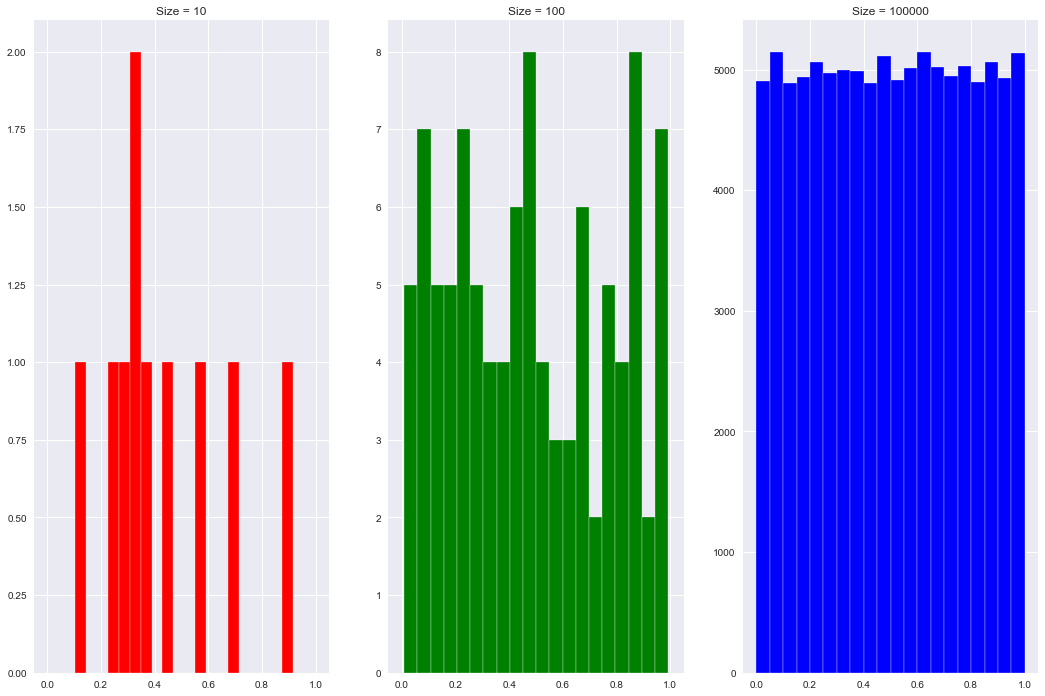

In [41]:
# Illustrating the impact of Size on the uniform distribution
# Define 3 ndarrays with varying Sizes
arr1 = np.random.uniform(0, 1, 10)
arr2 = np.random.uniform(0, 1, 100)
arr3 = np.random.uniform(0, 1, 100000)


fig, axs = plt.subplots(1, 3, sharex=True)

axs[0].hist(arr1, bins=20, edgecolor='white', color='red')
axs[0].title.set_text('Size = 10')
axs[1].hist(arr2, bins=20, edgecolor='white', color='green')
axs[1].title.set_text('Size = 100')
axs[2].hist(arr3, bins=20, edgecolor='white', color='blue')
axs[2].title.set_text('Size = 100000')


print(f'The mean with a sample size of 10 is: {arr1.mean()}')
print(f'The mean with a sample size of 100 is: {arr2.mean()}')
print(f'The mean with a sample size of 10000 is: {arr3.mean()}')


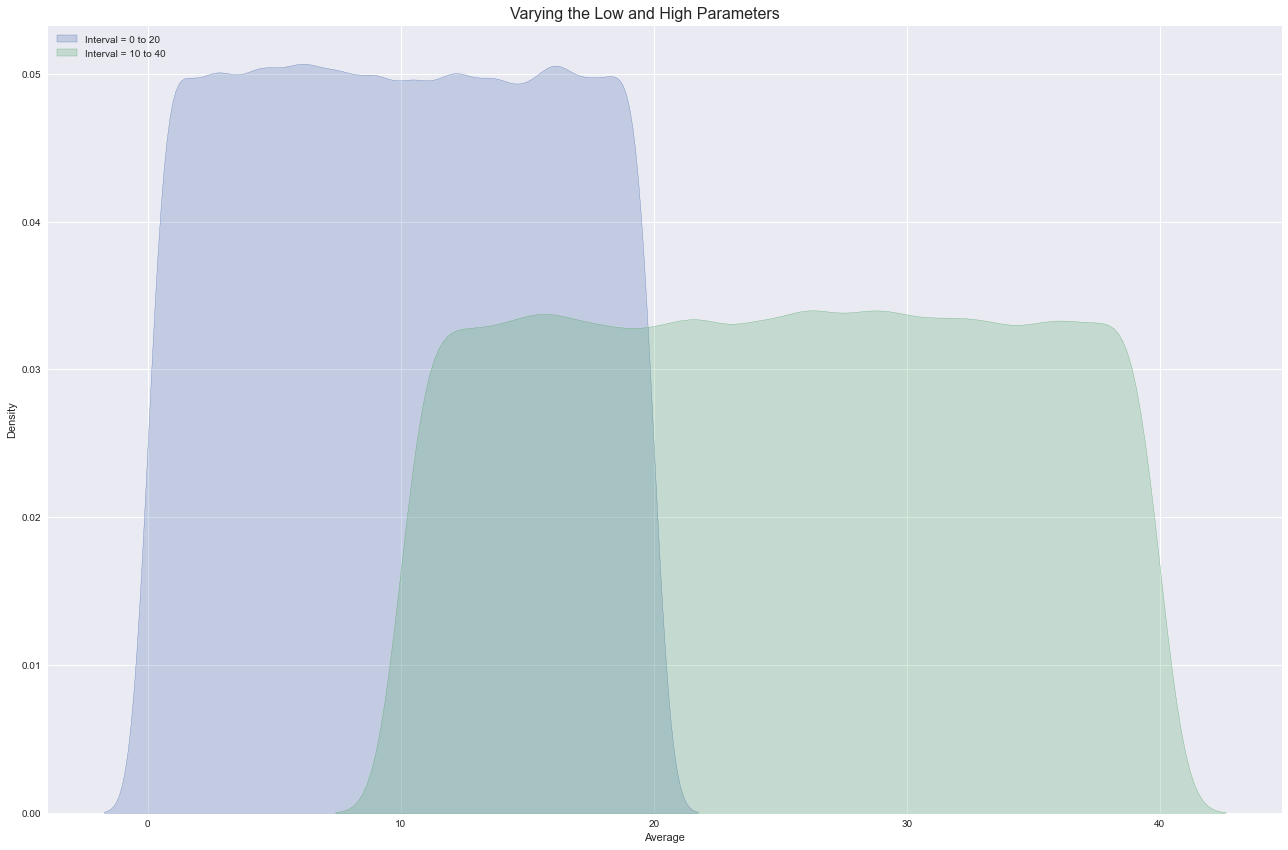

In [42]:
# Define ndarrays with different low and high values.
arr1 = np.random.uniform(0, 20, 100000)
arr2 = np.random.uniform(10, 40, 100000)

# Plot the distributions.
sns.kdeplot(arr1, fill = True, label = 'Interval = 0 to 20')
sns.kdeplot(arr2, fill = True,  label = 'Interval = 10 to 40')
# Define chart properties.
plt.legend(loc='upper left')
plt.xlabel('Average')
plt.suptitle('Varying the Low and High Parameters', fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

As the area under the curve must equal 1, you can see that, as we increase the width of our interval (high - low) we reduce the height of the uniform distribution.

<br>

## Weibull Distribution

***


The <code>numpy.random.weibull(a, size=None)</code> function draws random samples from the weibull distribution. The weibull distribution has the following parameters:

- a, the shape parameter of the distribution
- size, the output shape.

According to the NumPy documentation:
>The Weibull (or Type III asymptotic extreme value distribution for smallest values, SEV Type III, or Rosin-Rammler distribution) is one of a class of Generalized Extreme 
>Value (GEV) distributions used in modeling extreme value problems. This class includes the Gumbel and Frechet distributions.

The Weibull distribution is a continuous probability distribution named after Swedish mathematician Waloddi Weibull. The distribution was originally proposed as a model for material break strength. Today, the weibull distribution is commonly used to assess product reliability, analyze life data and model failure times. The Weibull can also fit a wide range of data from many other fields.

One interesting aspect of the weibull distribution is its flexibility. By changing the shape parameter it can model a variety of other distributions.

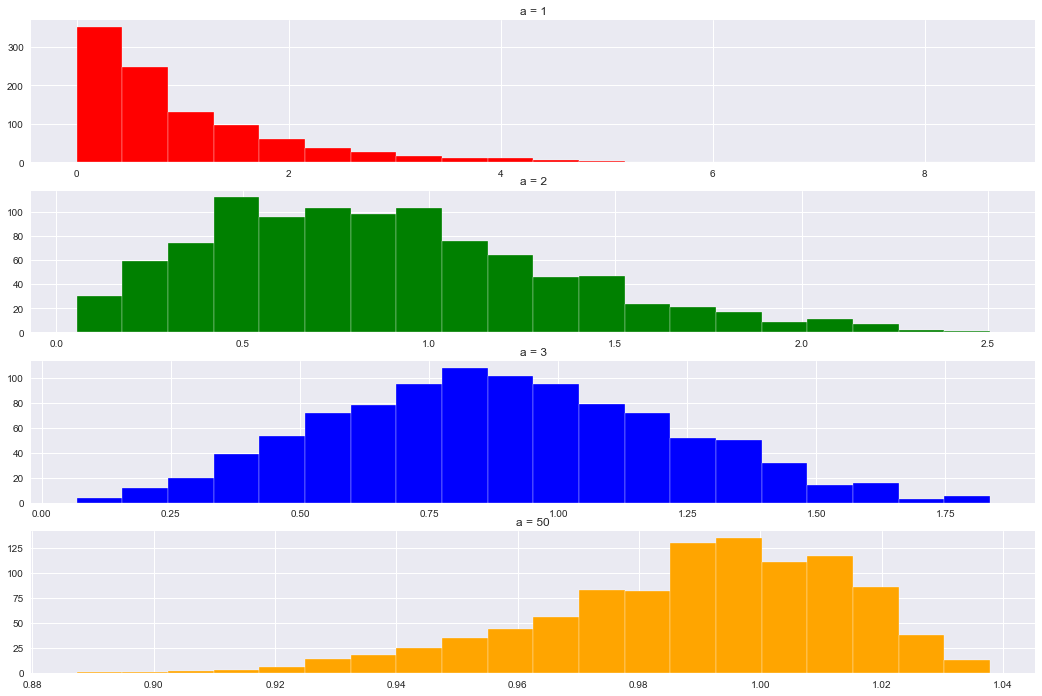

In [43]:
# Create 4 arrays with various shape parameters
arr1 = np.random.weibull(1, 1000)
arr2 = np.random.weibull(2, 1000)
arr3 = np.random.weibull(3, 1000)
arr4 = np.random.weibull(50, 1000)

# Set up subplots
fig, axs = plt.subplots(4, 1)

# Plot data in each subplot.
axs[0].hist(arr1, bins=20, edgecolor='white', color='red')
axs[0].title.set_text('a = 1')
axs[1].hist(arr2, bins=20, edgecolor='white', color='green')
axs[1].title.set_text('a = 2')
axs[2].hist(arr3, bins=20, edgecolor='white', color='blue')
axs[2].title.set_text('a = 3')
axs[3].hist(arr4, bins=20, edgecolor='white', color='orange')
axs[3].title.set_text('a = 50')




As you can see from the above output, the weibull distribution can model almost any distribution from extreme left skewed, to normal to extreme right skewed. This versatility is the reason why the Weibull distribution is used extensively in engineering particularly in the fields of reliability and life data analysis.

When the shape parameter is set to 1.0, the weibull distribution is equivalent to the exponential distribution. When the shape is set to 2.0 it is equivalent to a Rayleigh distribution. Setting the shape parameter to 3.0 sees the Weibull distribution match the normal distribution and anything greater than 3.7 produces a left skewed distribution.([17](https://statisticsbyjim.com/probability/weibull-distribution/))

In the world of reliability analysis the weibull shape parameter indicates whether a failure rate is increasing, constant or decreasing over time. Less than 1.0 is known as "infant mortality" and indicates that the product is failing during its 'burn in period', When the shape has a value of 1.0 there is a constant failure rate and when it is greater than 1.0 the failure rate is increasing over time, also known as End of Life wear out.([18](https://www.weibull.com/hotwire/issue14/relbasics14.htm))

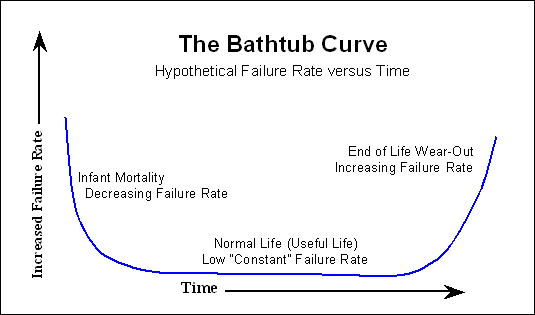



<br>

## Binomial Distribution

***


The <code>random.binomial(n, p, size=None</code> function draws random samples from the binomial distribution. The binomial distribution has certain key parameters:

- n, the number of trials.
- p, the probability of success.
- size, the output shape.

According to NIST:
>The binomial distribution is used when there are exactly two mutually exclusive outcomes of a trial. These outcomes are appropriately labeled "success" and "failure". The binomial
>distribution is used to obtain the probability of observing x successes in N trials, with the probability of success on a single trial denoted by p. The binomial distribution
>assumes that p is fixed for all trials.


Example Scenarios which can be modelled with the binomial distribution:

- Number of times a coin toss will result in heads.
- Whether a newly created drug will cure a given disease.
- The pass / fail rate of a given manufacturing process.

Essentially, any situation in which you can only have successes or failures in a fixed number of trials can be modelled using the binomial distribution.

<br>

### Evaluating the <code>numpy.random.exponential(n)</code> parameter.

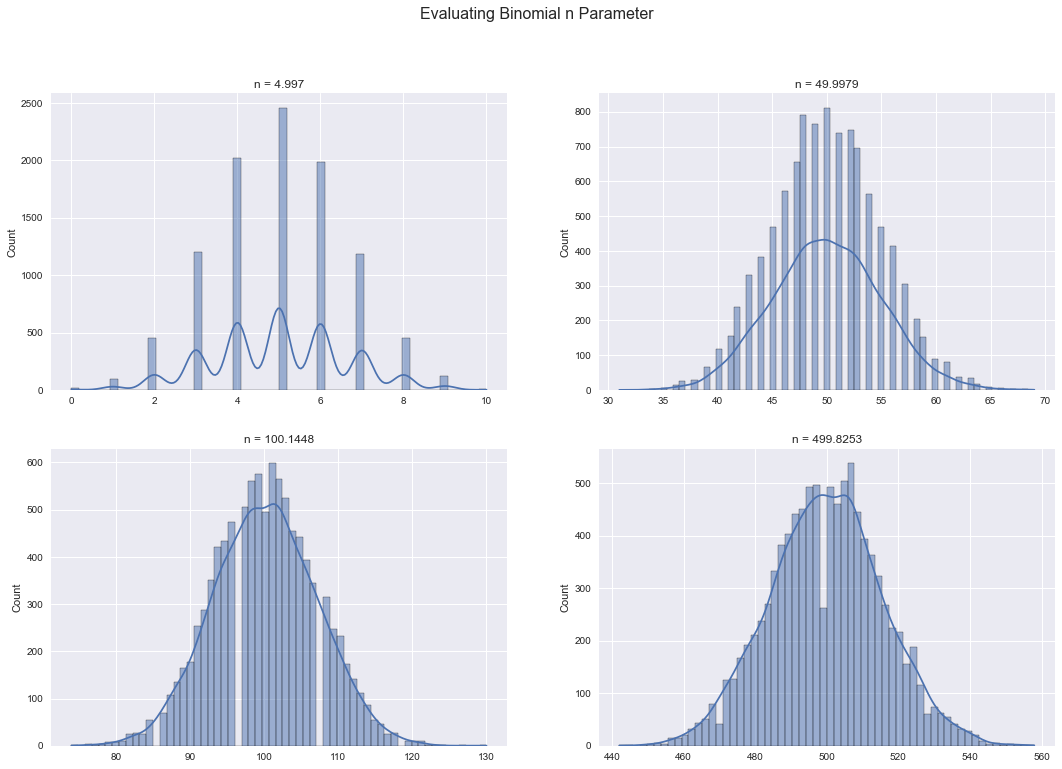

In [66]:
# Create 4 ndarrays with varying n values.
arr1 = np.random.binomial(10, 0.5, 10000)
arr2 = np.random.binomial(100, 0.5, 10000)
arr3 = np.random.binomial(200, 0.5, 10000)
arr4 = np.random.binomial(1000, 0.5, 10000)


# Initialize plot.
fig, axs = plt.subplots(2, 2)
fig.suptitle('Evaluating Binomial n Parameter', fontsize = 16)

# Plot subplots for each distribution.
ax1 = sns.histplot(arr1, ax=axs[0,0], kde = True)
ax1.title.set_text(f'n = {np.mean(arr1)}')
ax2 = sns.histplot(arr2, ax=axs[0,1], kde = True)
ax2.title.set_text(f'n = {np.mean(arr2)}')
ax3 = sns.histplot(arr3, ax=axs[1,0], kde = True)
ax3.title.set_text(f'n = {np.mean(arr3)}')
ax4 = sns.histplot(arr4, ax=axs[1,1], kde = True)
ax4.title.set_text(f'n = {np.mean(arr4)}')


We can see from our output that, as n increases, the binomial distribution will increasingly approach the normal distribution. This is a key tenant of the Central Limit Theorem.

<br>

### Evaluating the <code>numpy.random.exponential(p)</code> parameter.

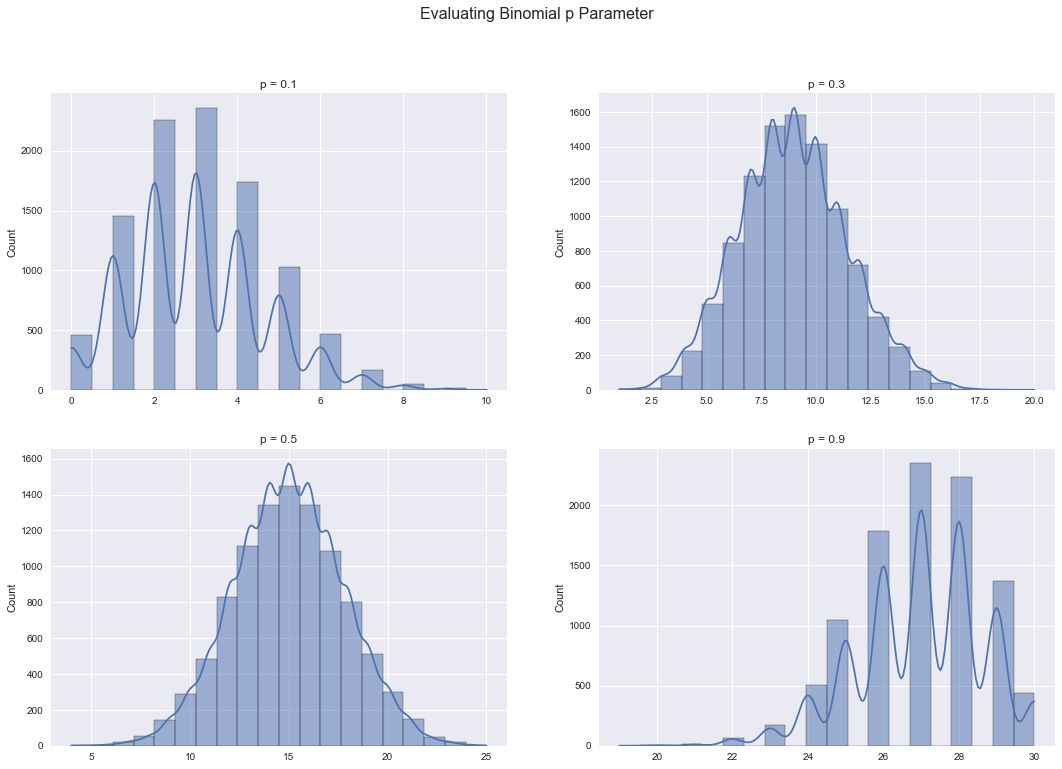

In [136]:
# Create 4 ndarrays from Binomial distribution with various p values
arr1 = np.random.binomial(30, 0.1, 10000)
arr2 = np.random.binomial(30, 0.3, 10000)
arr3 = np.random.binomial(30, 0.5, 10000)
arr4 = np.random.binomial(30, 0.9, 10000)



fig, axs = plt.subplots(2, 2)
fig.suptitle('Evaluating Binomial p Parameter', fontsize = 16)


ax1 = sns.histplot(arr1, ax=axs[0,0], kde = True, bins = 20)
ax1.title.set_text('p = 0.1')
ax2 = sns.histplot(arr2, ax=axs[0,1], kde = True, bins = 20)
ax2.title.set_text('p = 0.3')
ax3 = sns.histplot(arr3, ax=axs[1,0], kde = True, bins = 20)
ax3.title.set_text('p = 0.5')
ax4 = sns.histplot(arr4, ax=axs[1,1], kde = True, bins = 20)
ax4.title.set_text('p = 0.9')


With a smaller sample size, when the value of p in the <code>numpy.random.exponential</code> function is low, the probability distribution is negatively skewed. As we increase the value of p the distribution gradually becomes more positively skewed. Interestingly, as we can see from below, even with a extremely high, or extremely low value of p, if our number of successes (n) is sufficiently high, the distribution will apporach the normal distribution:

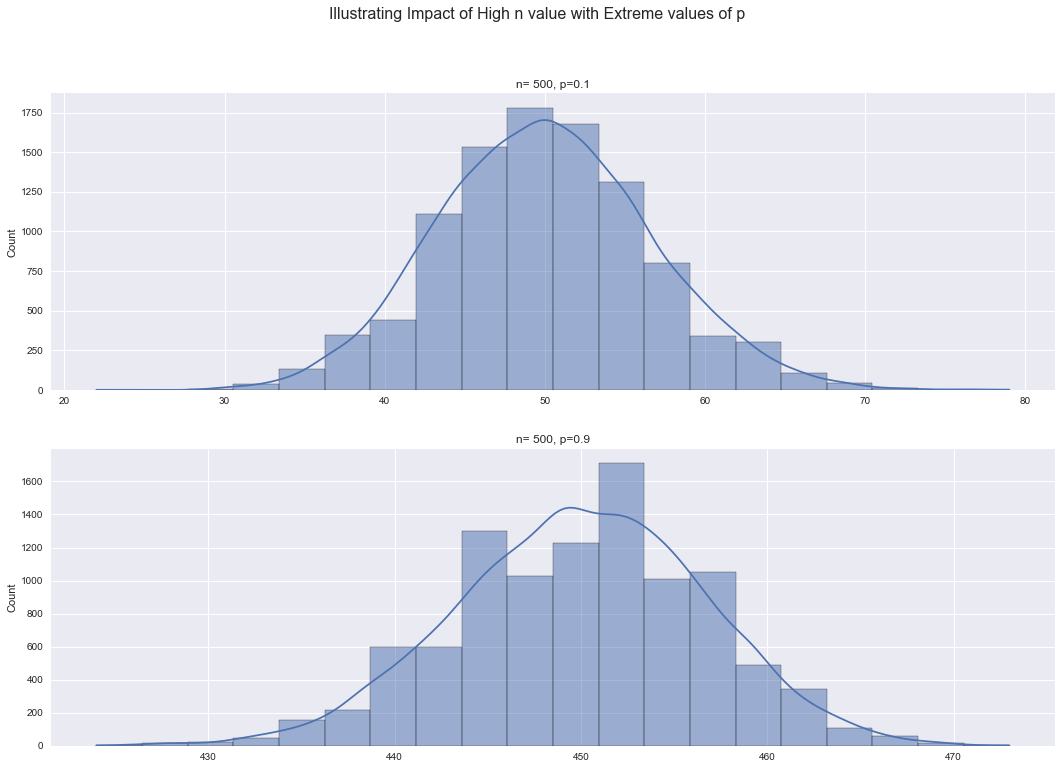

In [137]:
neg = np.random.binomial(500, 0.1, 10000)
pos = np.random.binomial(500, 0.9, 10000)

fig, axs = plt.subplots(2)
fig.suptitle('Illustrating Impact of High n value with Extreme values of p', fontsize = 16)


ax1 = sns.histplot(neg, ax=axs[0], kde = True, bins = 20)
ax1.title.set_text('n= 500, p=0.1')
ax2 = sns.histplot(pos, ax=axs[1], kde = True, bins = 20)
ax2.title.set_text('n= 500, p=0.9')


<br>

## Real World Example of Using <code>numpy.random.binomial</code>


One application of the binomial distribution in industry is when we examine pass / fail data on an inspection process. For example, lets say in a hypothetical manufacturing process where every part is inspected we have a failure rate of 3.5%. If we produce a batch of 10000 pieces and inspect 100 of them, what is the probability that less than 5 pieces will fail inspection?

Text(96, 0.32, 'Calculate probability to the right of the line')

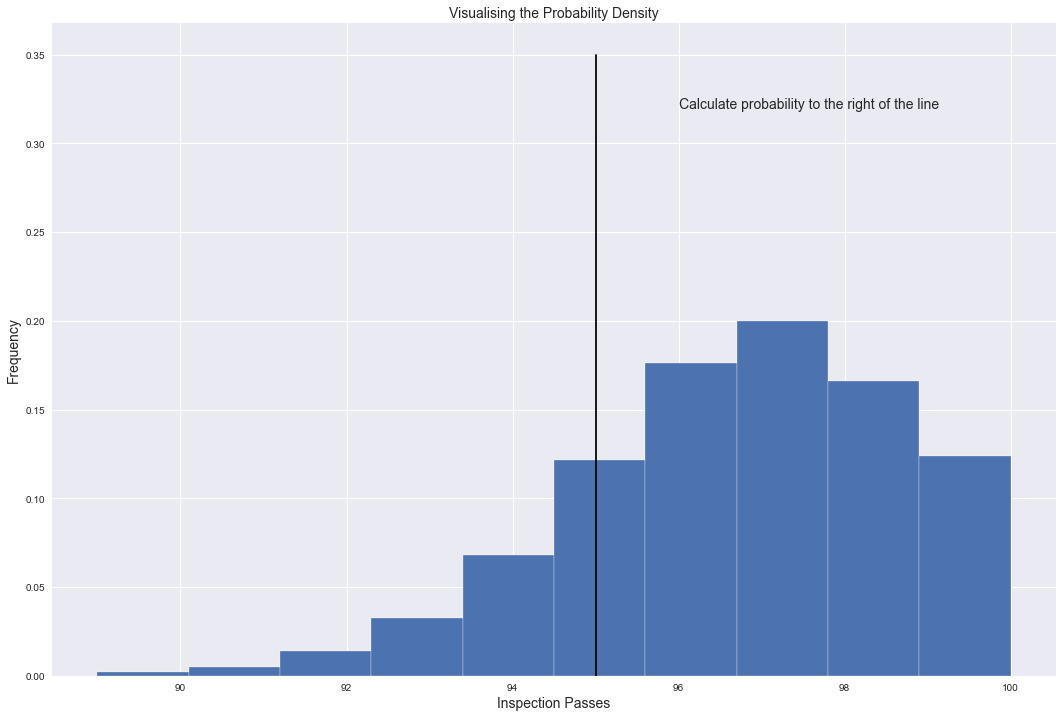

In [130]:
# Set parameters for binomial function
n, p, size = 100, 0.965, 10000
# Create binomial array.
data = np.random.binomial(n, p, size)

# Define figure.
count, bins, ignored = plt.hist(data, 10, density=True, label='Mean', edgecolor='white')

# Set labels and create vertical line and text.
plt.title('Visualising the Probability Density', size=14)
plt.xlabel('Inspection Passes', size=14)
plt.ylabel('Frequency', size=14)
plt.plot([95, 95], [0, 0.35], 'k-')
plt.text(96, 0.32, 'Calculate probability to the right of the line', size=14)

In [128]:
# Calculate probability to the right of the distribution.
prob = 1-(stats.binom.cdf(k=95, n=100, p=0.965))
print(f'The probability that less than 5 pieces will fail is: {prob} ')

The probability that less than 5 pieces will fail is: 0.7271642320067226 


## References

[1] Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). Available at:https://doi.org/10.1038/s41586-020-2649-2<br>
    accessed 24th October 2021<br>
[2] Bonner, A. The Ultimate Beginner’s Guide to NumPy. Towards Data Science (2019). Available at: https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54 <br> accessed 24th October 2021<br>
[3] numpy.org, What is NumPy? 2021. Available at: https://numpy.org/doc/stable/user/whatisnumpy.html accessed 24th October 2021<br>
[4] Gough, C. Performance of Numpy Array vs Python List (2019). Available at: https://medium.com/@gough.cory/performance-of-numpy-array-vs-python-list-194c8e283b65 accessed 24th October 2021.<br>
[5] McKinney, M. Python for Data Analysis. 120-124 (2018).<br>
[6] Micorsoft (2021). CryptGenRandom function (wincrypt.h). Available at:https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom?redirectedfrom=MSDN accessed 24th October 2021.<br>
[7] Hosch, L. W, Britannica. Uniform Distribution. Available at: https://www.britannica.com/topic/uniform-distribution-statistics accessed 31st October 2021.<br>
[8] numpy.org, numpy.random.randint. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html accessed 31st October 2021 <br>
[9] Weisstein, Eric W. "Interval." From MathWorld--A Wolfram Web Resource. Available at: https://mathworld.wolfram.com/Interval.html accessed November 11th 2021 <br>
[10] Van Rossum, G. PEP 3137 -- Immutable Bytes and Mutable Buffer (2007). Available at: https://www.python.org/dev/peps/pep-3137/ accessed November 11th <br>
[11] W3 Schools, Random Permutations. Available at: https://www.w3schools.com/python/numpy/numpy_random_permutation.asp accessed November 11th 2021<br>
[12] Pathak, M. Probability Distributions in Python Tutorial (2019). Available at: https://www.datacamp.com/community/tutorials/probability-distributions-python accessed 9th November 2021<br>
[13] O'Donnell, A., Buffini, M., Kehoe, L., Nugent, A., Kearney, J., Walton, J., Flynn, A., & McNulty, B. (2020). The prevalence of overweight and obesity in Irish children between 1990 and 2019. Public Health Nutrition, 23(14), 2512-2520. Available at:  https://doi.org/10.1017/S1368980020000920 accessed 9th November 2021<br>
[14] U.S Department of Commerce, Measures of Skewness and Kurtosis. Engineering Statistics Handbook (2013) Available at:https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm, accessed November 13th 2021<br>
[15] National Library of Medicine, Standard Deviation. Available at: https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod8_sd.html accessed 13th November 2021.<br>
[16] Reliawiki.org, The Exponential Distribution (2017). Available at: https://reliawiki.org/index.php/The_Exponential_Distribution accessed 13th November 2021<br>
[17] Frost, J. Weibull Distribution (2021). Available at: https://statisticsbyjim.com/probability/weibull-distribution/ accessed 1th November 2021.<br>
[18] Reliability Hot Wire, Weibull.com. Available at:https://www.weibull.com/hotwire/issue14/relbasics14.htm accessed November 15th 2021.

***

## End